In [16]:
import pandas as pd 
import numpy as np 
import networkx as nx 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

In [2]:
df = pd.read_csv('../data/raw/geotuscany.csv', index_col=0)
df.head()

,position,name,city,menu,link,score,N_reviews,price,Name,Province,...,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK,longitud§e
0,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,lucca,...,43.851808,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0,10.495633
1,551,Acino Bianco,Marina di Massa,False,/Restaurant_Review-g194814-d12843022-Reviews-A...,4.5,92,2.5,Acino Bianco,massacarrara,...,44.004616,10.115488,Italian,Dinner,"Vegetarian Friendly, Gluten Free Options",yEU_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g194814-d12843022-Reviews-A...,0,NaN
2,308,El Artista Ristorante Argentino,Massa,False,/Restaurant_Review-g660766-d17543924-Reviews-E...,4.5,78,2.5,El Artista Ristorante Argentino,massacarrara,...,44.041000,10.124396,"Barbecue, Argentinean, Steakhouse","Dinner, Lunch",NaN,U0P_https://maps.google.com/maps?saddr=&daddr=...,lucca,/Restaurant_Review-g660766-d17543924-Reviews-E...,0,NaN
3,1285,La Locanda di Bivigliano,Bivigliano,False,/Restaurant_Review-g1957776-d13948598-Reviews-...,NaN,28,NaN,La Locanda di Bivigliano,florence,...,43.893859,11.322421,"Italian, Mediterranean, Barbecue, Tuscan, Cent...",NaN,Vegetarian Friendly,rg1_https://maps.google.com/maps?saddr=&daddr=...,prato,/Restaurant_Review-g1957776-d13948598-Reviews-...,0,NaN
4,1499,Beach Bar @PuntAla,Punta Ala,False,/Restaurant_Review-g194871-d19315573-Reviews-B...,2.5,2,1.0,Beach Bar @PuntAla,grosseto,...,42.841410,10.775602,"Italian, Mediterranean","Lunch, Brunch, Drinks",NaN,32Q_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194871-d19315573-Reviews-B...,1,NaN


In [3]:
covidf = pd.read_csv('../data/raw/covidars.csv',sep='|')

print(covidf.geografia.unique())
covidf

['AR' 'FI' 'GR' 'LI' 'LU' 'MS' 'PI' 'PO' 'PT' 'SI' 'Toscana' 'aslCENTRO'
 'aslNO' 'aslSE']


,geografia,giorno,data,totale_casi_positivi,totale_casi_positivi_ab,deceduti,deceduti_inc,letalita,totale_ricoveri,totale_ricoveri_inc,attualmente_positivi,dimessi,tamponi,tamponi_inc
0,AR,0,24/2/2020,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FI,0,24/2/2020,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GR,0,24/2/2020,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LI,0,24/2/2020,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LU,0,24/2/2020,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6673,SI,476,14/6/2021,13811,52.408491,328.0,0.000000,2.374919,NaN,NaN,NaN,NaN,NaN,NaN
6674,Toscana,476,14/6/2021,243457,NaN,6819.0,0.044014,NaN,253.0,-3.065134,4206.0,232432.0,3768423.0,0.107694
6675,aslCENTRO,476,14/6/2021,112671,NaN,3417.0,0.029274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6676,aslNO,476,14/6/2021,84539,NaN,2302.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covidf['deceduti'].fillna(0, inplace=True)

In [5]:
provinceTags = ['PI','PO','LI','FI','AR','PT','GR','MS','SI','LU']
provinces = ['pisa','prato','livorno','florence','arezzo','pistoia','grosseto','massacarrara','siena','lucca']
provinceMap = {province: tag for province,tag in zip(provinces,provinceTags) }
df.province = df.province.map(provinceMap)

In [6]:
df.isnull().sum()

position                0
name                    0
city                    2
menu                    0
link                    0
score                 545
N_reviews               0
price                3041
Name                    0
Province                0
City                    0
claimed                 0
covidMeasure            0
travellersChoice        0
latitude                4
longitude               4
cuisines             1411
meals                6664
specialDiets         8762
positionlink            4
province                0
Link                 1839
provinceOK              0
longitud§e          15064
dtype: int64

In [8]:
G = nx.read_graphml('../data/raw/covidByUser.graphml',node_type=int)

In [29]:
for e in G.edges: 
    beginning  = datetime.strptime('20200224','%Y%m%d')
    start = (datetime.strptime(str(G.edges[e]['start']),'%Y%m%d') - beginning).days
    end =  (datetime.strptime(str(G.edges[e]['end']),'%Y%m%d') - beginning).days
    G.edges[e]['end'] = end
    G.edges[e]['start'] = start
    G.edges[e]['days'] = end - start
        

ValueError: time data '414' does not match format '%Y%m%d'

In [30]:
users = dict()

for e in G.edges:
    u,v,_ = e
    username = G.edges[e]['user']
    dist =  G.edges[e]['geodistance']
    if G.edges[e]['start'] == G.edges[e]['end'] : dist = dist/2
    if username not in users: 
        users[username] = {'visited':set(), 'distance' : 0}
        
    
    users[username]['visited'].add(u)
    users[username]['visited'].add(v)
    
    
    
for user in users: 
    users[user]['n_visited'] = len(users[user]['visited'])

In [31]:
user = dict()
for e in G.edges:
    if  G.edges[e]['user'] == 'Giu_8a': 
        user[e] = G.edges[e]

In [32]:
nodebydate = dict()

for e in user:
    u,v,_ = e
    start = user[e]['start']
    end = user[e]['end']
    if start not in nodebydate: nodebydate[start] = list()
    if end not in nodebydate: nodebydate[end] = list()
    nodebydate[start].append(u)
    nodebydate[end].append(v)

In [33]:
g = nx.DiGraph()
for e in user:
    u,v,_ = e
    g.add_edge(u,v)

In [34]:


positions = dict()
width = 10 
height = 5

for i, date in enumerate(sorted(nodebydate.keys(),reverse=False)):
    x = i 
    reviews = nodebydate[date]
    for j, restaurant in enumerate(reviews): 
        y = height / len(reviews) * j
        positions[restaurant] = (x,y)

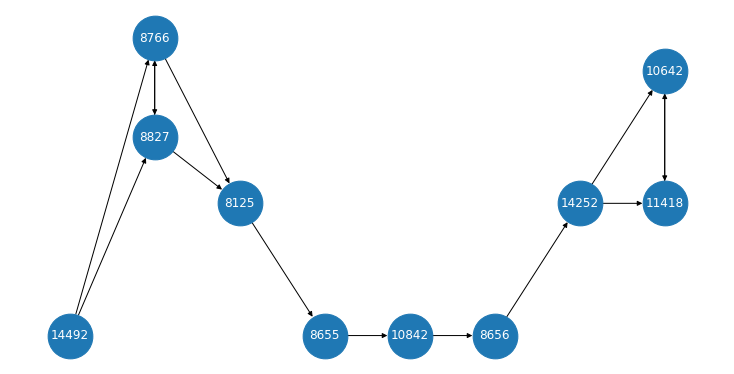

In [35]:
plt.figure(figsize=(width,height))
           
           
nx.draw(g, pos= positions, with_labels=True,node_size =2000, font_color='w')

In [10]:
print(len(G.nodes),len(G.edges),nx.density(G))
print(min(set([G.edges[e]['start'] for e in G.edges])))
print(max(set([G.edges[e]['end'] for e in G.edges])))

9219 111863 0.001316333528836451
0
431


In [27]:
S = G.edge_subgraph([e for e in G.edges if G.edges[e]['end']>=0])

US = S.to_undirected()
components =  [c for c in sorted(nx.connected_components(US), key=len, reverse=True)]
for l in [len(c) for c in components]: print(l,end= ' ')


9107 

In [28]:

G = S.subgraph(components[0])
print(len(G.edges))

111741


In [14]:
for node in G.nodes:
    G.nodes[node]['province'] = df.loc[int(node),'province']
    G.nodes[node]['covidMeasure'] = int(df.loc[int(node),'covidMeasure'])
    G.nodes[node]['latitude'] = df.loc[int(node),'latitude']
    G.nodes[node]['longitude'] = df.loc[int(node),'longitude']
    


In [17]:
for e in tqdm(G.edges): 
    i,j,k = e
    xi, yi = df.loc[int(i),['longitude','latitude']]
    xj, yj = df.loc[int(j),['longitude','latitude']]
    G.edges[e]['geodistance'] = ((xj-xi)**2 + (yj-yi)**2)**0.5
    

100%|█████████████████████████████████████████████████████████████████████████| 111741/111741 [02:57<00:00, 629.54it/s]


In [18]:
for node in list(G.nodes)[:3]: print(G.nodes[node])
for node in list(G.edges)[:3]: print(G.edges[node])

{'province': 'PI', 'covidMeasure': 0, 'latitude': 43.85180773789867, 'longitude': 10.506207}
{'province': 'LU', 'covidMeasure': 0, 'latitude': 43.85135, 'longitude': 10.506207}
{'province': 'FI', 'covidMeasure': 0, 'latitude': 43.76973, 'longitude': 11.26562}
{'start': 414, 'end': 414, 'user': 'RobertaC2372', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'ClaudioC138', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'juan pablo A 116887066', 'days': 0, 'geodistance': 0.0004577378986709846}


In [19]:

UG = G.to_undirected()
components =  [c for c in sorted(nx.connected_components(UG), key=len, reverse=True)]
for l in [len(c) for c in components]: print(l,end= ' ')

9107 

In [36]:
nx.write_graphml(G,'../data/clean/byuser.graphml')

## ARSCOVID

In [14]:
from itertools import product

In [15]:
columns = [p+'-'+col for p,col in list(product(provinceTags,['positivi','deceduti']))]
columns

['PI-positivi',
 'PI-deceduti',
 'PO-positivi',
 'PO-deceduti',
 'LI-positivi',
 'LI-deceduti',
 'FI-positivi',
 'FI-deceduti',
 'AR-positivi',
 'AR-deceduti',
 'PT-positivi',
 'PT-deceduti',
 'GR-positivi',
 'GR-deceduti',
 'MS-positivi',
 'MS-deceduti',
 'SI-positivi',
 'SI-deceduti',
 'LU-positivi',
 'LU-deceduti']

In [16]:
arscovid = pd.DataFrame(index=range(477), columns= columns)
arscovid

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for _,row in covidf.iterrows(): 
    
    prov = row['geografia']
    if prov in provinceTags:
        day = row['giorno']
        arscovid.loc[day, prov+'-'+'deceduti'] = row['deceduti']
        arscovid.loc[day, prov+'-'+'positivi'] = row['totale_casi_positivi']
    

In [18]:
index = pd.date_range("2020-02-14", periods=477, freq="D")
arscovid.set_index(index, inplace=True)

In [19]:
arscovid.reset_index(inplace=True)

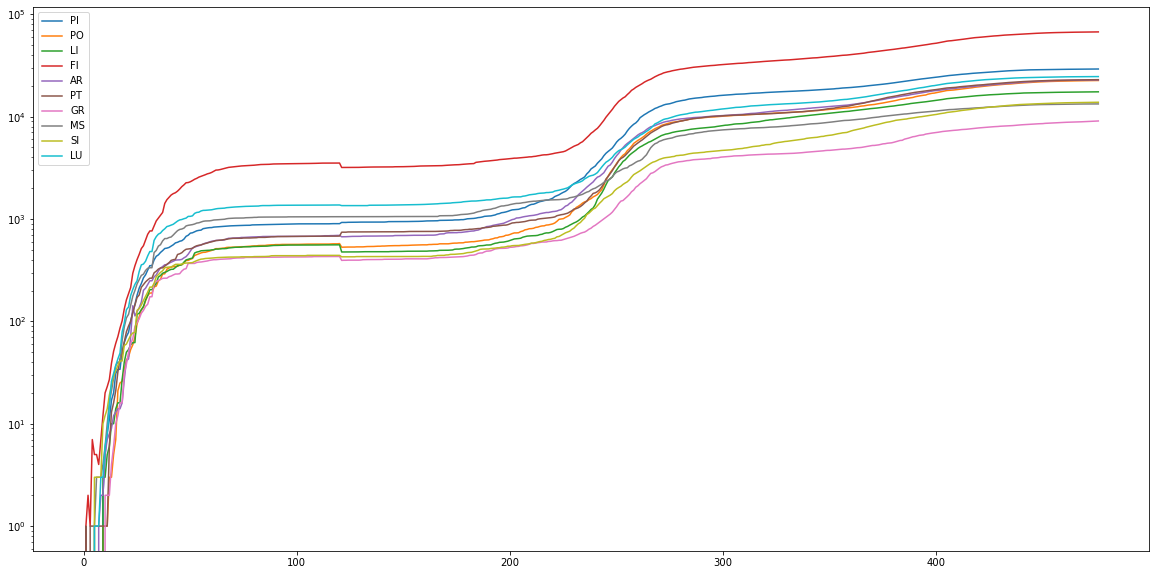

In [20]:
plt.figure(figsize=(20,10))
for p in provinceTags:
    plt.plot(arscovid[p+'-'+'positivi'],label=p)
    plt.yscale('log')
plt.legend()

In [253]:
dates = [G.edges[e]['end'] for e in G.edges]

In [254]:
len(dates)

61366

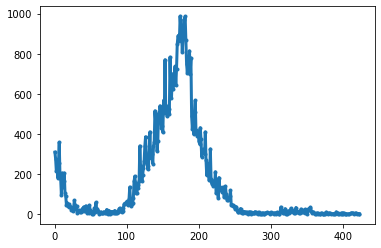

In [173]:
import collections
dates_sequence = sorted(dates, reverse=True)  # degree sequence
dateCount = collections.Counter(dates_sequence)
deg, cnt = zip(*dateCount.items())
plt.plot(deg, cnt,  marker='.', lw=3)


In [21]:
arscovid

,index,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,...,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
0,2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,...,22920,626.0,8972,180.0,13289,523.0,13770,327.0,24567,662.0
473,2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,...,22933,626.0,8988,180.0,13292,523.0,13784,327.0,24578,662.0
474,2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,...,22938,626.0,9010,180.0,13296,523.0,13801,328.0,24591,662.0
475,2021-06-03,29168,700.0,22517,594.0,17455,416.0,67177,2195.0,22818,...,22944,627.0,9038,180.0,13299,524.0,13808,328.0,24596,662.0


In [163]:
pd.qcut(pd.Series(dates_sequence), q=5, precision=0)

0        (194.0, 423.0]
1        (194.0, 423.0]
2        (194.0, 423.0]
3        (194.0, 423.0]
4        (194.0, 423.0]
              ...      
61361     (-1.0, 137.0]
61362     (-1.0, 137.0]
61363     (-1.0, 137.0]
61364     (-1.0, 137.0]
61365     (-1.0, 137.0]
Length: 61366, dtype: category
Categories (5, interval[float64]): [(-1.0, 137.0] < (137.0, 162.0] < (162.0, 177.0] < (177.0, 194.0] < (194.0, 423.0]]

In [189]:

arscovid

,index,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,...,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
0,2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,...,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,...,20922,541.0,7969,157.0,12460,510.0,12467,282.0,23227,617.0
428,2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,...,20996,544.0,7986,159.0,12491,512.0,12498,284.0,23253,619.0
429,2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,...,21094,559.0,8013,159.0,12538,513.0,12565,285.0,23323,622.0
430,2021-04-19,27662,652.0,20519,505.0,16537,393.0,62004,1968.0,20808,...,21218,564.0,8053,159.0,12574,513.0,12633,287.0,23409,622.0


In [24]:
arscovid.set_index('index',inplace=True)

In [183]:
arscovid.drop('level_0',axis=1,inplace=True)

In [25]:
arscovid

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
index,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,22920,626.0,8972,180.0,13289,523.0,13770,327.0,24567,662.0
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,22933,626.0,8988,180.0,13292,523.0,13784,327.0,24578,662.0
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,22938,626.0,9010,180.0,13296,523.0,13801,328.0,24591,662.0


In [26]:
arscovid.to_csv('../data/clean/covidars.csv')

In [224]:
nx.write_edgelist(G.copy(),'../data/clean/byuser.edgelist')

In [225]:
type(G)

networkx.classes.multidigraph.MultiDiGraph